

# Regression - CAR SALES PREDUCTION
```



In [1]:
!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

!tar xf spark-3.2.1-bin-hadoop2.7.tgz

!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark

findspark.init()

import pyspark

     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 198 kB 51.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=b9c1da776d2f17ee03f9705dea091fef6fd63fe106535fdf047b7433643efbde
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [2]:
### Initialize the spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
import pyspark.ml as ml

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("app_analytics").getOrCreate()
spark

In [6]:
# Load the dataset
car_sales  = spark.read.csv('Car_sales.csv',inferSchema=True,header=True)

In [7]:
car_sales.show()

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|       Acura|    Integra|            16.919|                 16.36|   Passenger|              21.5|        1.8|       140|    101.2| 67.3| 172.4|      2.639|         13.2|             28|     2/2/2012|      58.28014952|
|       Acura|         TL|            39.384|                19.875|   Passenger|              28.4|        3.2|    

In [8]:
car_sales.createOrReplaceTempView("car_sales")

In [9]:
spark.sql("""select distinct Vehicle_type from car_sales""" ).show()

+------------+
|Vehicle_type|
+------------+
|         Car|
|   Passenger|
+------------+



In [10]:
spark.sql("""select distinct Model from car_sales""" ).show()

+-------------+
|        Model|
+-------------+
|       Cirrus|
|      Contour|
|        RX300|
|     Villager|
|           SC|
|      Cutlass|
|           SL|
|        Camry|
|      Seville|
|    Ram Wagon|
|      Outback|
|         300M|
|           A6|
|Grand Marquis|
|         Golf|
|     Forester|
|       Sentra|
|     Cherokee|
|        Focus|
|     Wrangler|
+-------------+
only showing top 20 rows



In [11]:
spark.sql("""select distinct Manufacturer from car_sales""" ).show(50)

+------------+
|Manufacturer|
+------------+
|  Volkswagen|
|  Oldsmobile|
|    Infiniti|
|       Lexus|
|      Jaguar|
|      Saturn|
|        Jeep|
|  Mitsubishi|
|   Chevrolet|
|       Volvo|
|     Hyundai|
|        Saab|
|       Honda|
|        Audi|
|    Cadillac|
|    Plymouth|
|     Pontiac|
|     Mercury|
|    Chrysler|
|     Lincoln|
|         BMW|
|       Acura|
|  Mercedes-B|
|       Buick|
|     Porsche|
|      Toyota|
|       Dodge|
|      Nissan|
|        Ford|
|      Subaru|
+------------+



In [12]:
car_sales.count()

157

In [13]:
car_sales.describe().show()

+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+
|summary|Manufacturer| Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|       Engine_size|        Horsepower|         Wheelbase|             Width|            Length|       Curb_weight|     Fuel_capacity|   Fuel_efficiency|Latest_Launch| Power_perf_factor|
+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+
|  count|         157|   157|               157|                   121|         157|               155|               156|           

In [14]:
import pyspark.sql.functions as F
def count_missings(spark_df,sort=True):
    """
    Counts number of nulls and nans in each column
    """
    df = spark_df.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in spark_df.dtypes if c_type not in ('timestamp', 'string', 'date')]).toPandas()

    if len(df) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return df.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return df

In [15]:
count_missings(car_sales)

,count
four_year_resale_value,36
Fuel_efficiency,3
Price_in_thousands,2
Curb_weight,2
Power_perf_factor,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1
Length,1


In [16]:
car_sales.count() 

157

In [17]:
car_sales.agg(avg('four_year_resale_value')).show()

+---------------------------+
|avg(four_year_resale_value)|
+---------------------------+
|         18.072975206611574|
+---------------------------+



In [18]:
avg('Price_in_thousands')

Column<'avg(Price_in_thousands)'>

In [19]:
#car_sales.four_year_resale_value.na.fill('10').show()

In [20]:
car_sales.agg(avg('four_year_resale_value')).show()


+---------------------------+
|avg(four_year_resale_value)|
+---------------------------+
|         18.072975206611574|
+---------------------------+



In [21]:
final_df= car_sales.na.drop()

In [22]:
final_df.count()

117

In [23]:
count_missings(final_df)

,count
Sales_in_thousands,0
four_year_resale_value,0
Price_in_thousands,0
Engine_size,0
Horsepower,0
Wheelbase,0
Width,0
Length,0
Curb_weight,0
Fuel_capacity,0


## Exploring the data

In [24]:
#We can also explicitly ask for specific stats about columns by passing appropriate stats functions
from pyspark.sql.functions import mean, min, max
final_df.select([max('Price_in_thousands'), mean('Price_in_thousands'), min('Price_in_thousands')] ).show()

+-----------------------+-----------------------+-----------------------+
|max(Price_in_thousands)|avg(Price_in_thousands)|min(Price_in_thousands)|
+-----------------------+-----------------------+-----------------------+
|                   82.6|     25.969487179487164|                  9.235|
+-----------------------+-----------------------+-----------------------+



In [25]:
#Using crosstab function
final_df.stat.crosstab("Manufacturer","Model").show()

+------------------+------+----+-------+----+---+---+---+------+------+------+------+------+-------+----------+------+-------+------+-------+----+------+------+-----+-------+--------------+-------------+------+--------+------+-------+--------+------+-----+--------+-----------+-------+-------+--------+------+--------------+-------+------+-------+--------+-------+-----+-------+-------+--------+------+----------+--------+--------+--------+-----+---+------+----+--------+--------------+-------------+----------+---+-------+-----+---+-----+------------+-------+------+------+------+-----+------+-----------+-------+-------------+-----------+-------+--------+----+-------+-----------+------+--------+----------+-----+-----+----+---+----------+-------+---------+------+-----+-------+---+---+--------+---+-----+-------------+-------------+------+----------+------+-------+-------+---+------+------+--------+--------+-----+-------+--------+--------+
|Manufacturer_Model|3000GT|328i|4Runner|528i| A4| A6| A

In [26]:
#Mean and standard deviation of prices for Manufacturer by different conditions
from pyspark.sql.functions import avg, stddev

price_conditon_avg_df = final_df.groupBy('Manufacturer').agg(avg('Price_in_thousands'))
price_conditon_avg_df.show()

+------------+-----------------------+
|Manufacturer|avg(Price_in_thousands)|
+------------+-----------------------+
|  Volkswagen|                 18.058|
|  Oldsmobile|               27.82925|
|    Infiniti|                 29.465|
|       Lexus|                 41.105|
|      Saturn|     12.503333333333332|
|        Jeep|     20.991666666666664|
|  Mitsubishi|     22.167428571428577|
|   Chevrolet|              20.164375|
|     Hyundai|     12.165666666666667|
|       Honda|     20.276999999999997|
|        Audi|                  39.98|
|    Cadillac|      36.85666666666667|
|    Plymouth|     15.856666666666667|
|     Pontiac|                 22.412|
|     Mercury|     20.748333333333335|
|    Chrysler|                  22.28|
|     Lincoln|                 41.205|
|         BMW|                  36.15|
|       Acura|     30.633333333333336|
|  Mercedes-B|     58.487500000000004|
+------------+-----------------------+
only showing top 20 rows



In [27]:
#Plotting distribution of price
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [28]:
car_price_pd = final_df.select('Price_in_thousands').toPandas()

In [29]:
car_price_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  117 non-null    float64
dtypes: float64(1)
memory usage: 1.0 KB


In [30]:
car_price_pd.head()

,Price_in_thousands
0,21.50
1,28.40
2,42.00
3,23.99
4,33.95


In [31]:
import pandas as pd

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


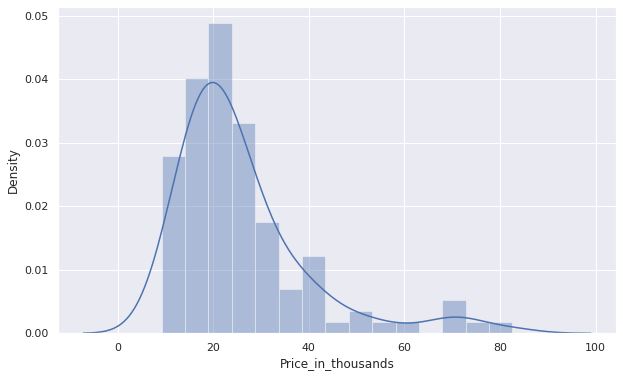

In [32]:
#Density Plot
sn.set(rc={"figure.figsize": (10, 6)})
sn.distplot(pd.to_numeric(car_price_pd['Price_in_thousands']), norm_hist=True)

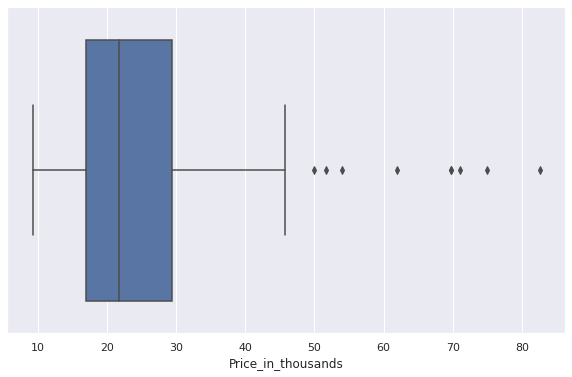

In [33]:
#Boxplot
sn.boxplot(x= pd.to_numeric(car_price_pd['Price_in_thousands']))

In [34]:
#final_df.stat.corr( 'price', 'sqft_living' )

In [35]:
# Which factors are hightly correlated with price
import numpy as np
from pyspark.mllib.stat import Statistics

In [36]:
final_df.show()

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|       Acura|    Integra|            16.919|                 16.36|   Passenger|              21.5|        1.8|       140|    101.2| 67.3| 172.4|      2.639|         13.2|             28|     2/2/2012|      58.28014952|
|       Acura|         TL|            39.384|                19.875|   Passenger|              28.4|        3.2|    

In [37]:
final_df.columns

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 'four_year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']

In [38]:
final_df1= final_df

In [39]:
#Columns that will be used as features and their types
continuous_features = [
 'Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

categorical_features = [
'Manufacturer',
'Model',
 'Vehicle_type'
]

In [40]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [41]:
# create object of StringIndexer class and specify input and output column
SI_Manufacturer = StringIndexer(inputCol='Manufacturer',outputCol='Manufacturer_Index')
SI_Model = StringIndexer(inputCol='Model',outputCol='Model_Index')
SI_Vehicle_type = StringIndexer(inputCol='Vehicle_type',outputCol='SI_Vehicle_type_Index')



In [42]:


# transform the data
final_df1 = SI_Manufacturer.fit(final_df1).transform(final_df1)
final_df1 = SI_Model.fit(final_df1).transform(final_df1)
final_df1 = SI_Vehicle_type.fit(final_df1).transform(final_df1)


# view the transformed data
final_df1.select('Manufacturer', 'Manufacturer_Index', 'Model', 'Model_Index', 'Vehicle_type', 'SI_Vehicle_type_Index').show(10)


+------------+------------------+-------+-----------+------------+---------------------+
|Manufacturer|Manufacturer_Index|  Model|Model_Index|Vehicle_type|SI_Vehicle_type_Index|
+------------+------------------+-------+-----------+------------+---------------------+
|       Acura|              14.0|Integra|       63.0|   Passenger|                  0.0|
|       Acura|              14.0|     TL|      107.0|   Passenger|                  0.0|
|       Acura|              14.0|     RL|       88.0|   Passenger|                  0.0|
|        Audi|              15.0|     A4|        5.0|   Passenger|                  0.0|
|        Audi|              15.0|     A6|        6.0|   Passenger|                  0.0|
|        Audi|              15.0|     A8|        7.0|   Passenger|                  0.0|
|         BMW|              23.0|   328i|        2.0|   Passenger|                  0.0|
|         BMW|              23.0|   528i|        4.0|   Passenger|                  0.0|
|       Buick|       

In [43]:
# create object and specify input and output column
OHE = OneHotEncoder(inputCols=['Manufacturer_Index', 'Model_Index','SI_Vehicle_type_Index'],outputCols=['Manufacturer_vec', 'Model_vec','SI_Vehicle_type_vec'])



In [44]:
# transform the data
final_df1 = OHE.fit(final_df1).transform(final_df1)

# view and transform the data
final_df1.select('Manufacturer', 'Manufacturer_Index','Manufacturer_vec', 'Model', 'Model_Index','Model_vec', 'Vehicle_type', 'SI_Vehicle_type_Index','SI_Vehicle_type_vec').show(10)

+------------+------------------+----------------+-------+-----------+-----------------+------------+---------------------+-------------------+
|Manufacturer|Manufacturer_Index|Manufacturer_vec|  Model|Model_Index|        Model_vec|Vehicle_type|SI_Vehicle_type_Index|SI_Vehicle_type_vec|
+------------+------------------+----------------+-------+-----------+-----------------+------------+---------------------+-------------------+
|       Acura|              14.0| (25,[14],[1.0])|Integra|       63.0| (115,[63],[1.0])|   Passenger|                  0.0|      (1,[0],[1.0])|
|       Acura|              14.0| (25,[14],[1.0])|     TL|      107.0|(115,[107],[1.0])|   Passenger|                  0.0|      (1,[0],[1.0])|
|       Acura|              14.0| (25,[14],[1.0])|     RL|       88.0| (115,[88],[1.0])|   Passenger|                  0.0|      (1,[0],[1.0])|
|        Audi|              15.0| (25,[15],[1.0])|     A4|        5.0|  (115,[5],[1.0])|   Passenger|                  0.0|      (1,[0],

In [45]:
final_df1.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Sales_in_thousands: double (nullable = true)
 |-- four_year_resale_value: double (nullable = true)
 |-- Vehicle_type: string (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: integer (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Length: double (nullable = true)
 |-- Curb_weight: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: integer (nullable = true)
 |-- Latest_Launch: string (nullable = true)
 |-- Power_perf_factor: double (nullable = true)
 |-- Manufacturer_Index: double (nullable = false)
 |-- Model_Index: double (nullable = false)
 |-- SI_Vehicle_type_Index: double (nullable = false)
 |-- Manufacturer_vec: vector (nullable = true)
 |-- Model_vec: vector (nullable = true)
 |-- SI_Vehicle_type_vec: vector (nullable = t

In [46]:
final_df1.show(5)

+------------+-------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+-----------------+-------------------+
|Manufacturer|  Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|Manufacturer_Index|Model_Index|SI_Vehicle_type_Index|Manufacturer_vec|        Model_vec|SI_Vehicle_type_vec|
+------------+-------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+-----------------+-------------------+
|       Acura|Integra|   

In [47]:
#Create vectors from all features column
featureCols = continuous_features + ['Manufacturer_vec',
                                   'Model_vec',
                                   'SI_Vehicle_type_vec',
                                   ]

In [48]:
featureCols

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor',
 'Manufacturer_vec',
 'Model_vec',
 'SI_Vehicle_type_vec']

### Preparing for model building
- The dataframe need to have two columns: features and label
- The vector columns need to named as features
- The target variable need to be named as label
- Then the dataframe can be directly fed to a model to learn

In [49]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [50]:
final_train_df = assembler.transform( final_df1 )

In [51]:
final_train_df.show( 10 , truncate=False)

+------------+-------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+-----------------+-------------------+-------------------------------------------------------------------------------------------------------------------------------------+
|Manufacturer|Model  |Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|Manufacturer_Index|Model_Index|SI_Vehicle_type_Index|Manufacturer_vec|Model_vec        |SI_Vehicle_type_vec|features                                                                                                                             |
+------------+-------+------------------+----------------------+------------+-----

In [52]:
from pyspark.sql.functions import round

final_train_df = final_train_df.withColumn( "label", round('Price_in_thousands', 4) )

In [53]:
#Split the dataset
train_df, test_df = final_train_df.randomSplit( [0.7, 0.3], seed = 42 )

In [54]:
#Build the Linear Regression Model
from pyspark.ml.regression import LinearRegression

In [55]:
#linreg = LinearRegression(maxIter=500, regParam=0.0)
linreg = LinearRegression()

In [56]:
lm = linreg.fit( train_df )

In [57]:
dir(lm)

['__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_call_java',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_create_params_from_java',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_from_java',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_array',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transfer_param_map_from_java',
 '_transfer_param_map_to_java',
 '_transfer_params_from_java',
 '_transfer_params_to_java',
 '_transform',
 'aggregationDepth',
 'clear',
 'coeffi

In [58]:
lm.intercept

-3.2542110360684684

In [59]:
lm.coefficients

DenseVector([-0.009, 0.2109, 0.1856, 1.1108, 0.0283, -0.0214, 0.0385, 0.0021, 1.5017, 0.1568, -0.0807, 0.0736, -1.1753, -1.2615, -0.6207, -0.228, -0.6036, -1.1352, -1.0069, -0.9061, -0.5686, -1.3314, -0.5996, -1.1824, 8.6128, -0.5783, 1.8934, 2.5919, 0.4762, -1.7547, -4.1354, 1.5417, -1.6379, 6.3644, -0.7643, 2.365, 3.361, -1.5419, -1.0397, 0.0, -0.5835, 2.365, -2.0249, -0.113, 9.7142, 0.3712, 0.0, 0.1357, 1.0494, -2.4478, 0.0, 0.0, -1.2401, 1.4453, -0.6321, 0.0, 0.9304, 0.0, 0.0, -0.2474, 0.0, 13.8057, 0.0, 0.4762, -1.0808, -1.2134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2028, -0.653, -1.0306, -0.725, -5.9225, -2.8783, 0.0, 0.0, 0.0, 0.8254, -1.9223, -1.0015, -2.6164, 0.0, 0.0, -0.1705, 4.2769, 0.0, -2.3796, 0.5311, -0.0963, 0.0, -1.6019, -1.2284, 2.4516, 0.0, -3.3023, 0.0, -0.39, -0.0546, -2.8918, 5.8977, 7.8376, 0.0, -3.8909, 0.0, -1.2397, 3.4127, 0.1609, 0.0, 0.175, -1.1582, 0.0, 0.0, 0.2055, -2.7195, 1.4584, 0.0, 0.0, 0.0, -0.355, 0.2843, -0.0948, 4.1281, 0.0, -8.2801, 0.0, -1.5565, -3.

In [60]:
y_pred_train = lm.transform(train_df)

In [61]:
y_pred_train.show(10)

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+----------------+-------------------+--------------------+------+------------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|Manufacturer_Index|Model_Index|SI_Vehicle_type_Index|Manufacturer_vec|       Model_vec|SI_Vehicle_type_vec|            features| label|        prediction|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------

In [62]:
#Make predictions on test data and evaluate
y_pred_test = lm.transform( test_df )

In [63]:
y_pred_test.show(10, truncate=False)

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+-----------------+-------------------+---------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|Manufacturer|Model      |Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|Manufacturer_Index|Model_Index|SI_Vehicle_type_Index|Manufacturer_vec|Model_vec        |SI_Vehicle_type_vec|features                                                                                                                               |label |prediction        |
+------------+----

In [64]:
y_pred_test.select( 'features',  'label', 'prediction', 'Price_in_thousands' ).show( 5 )

+--------------------+------+------------------+------------------+
|            features| label|        prediction|Price_in_thousands|
+--------------------+------+------------------+------------------+
|(153,[0,1,2,3,4,5...|  28.4|32.305205636134275|              28.4|
|(153,[0,1,2,3,4,5...|  33.4|  33.2011530825236|              33.4|
|(153,[0,1,2,3,4,5...|21.975|22.896150441284906|            21.975|
|(153,[0,1,2,3,4,5...|27.885|27.151395644593975|            27.885|
|(153,[0,1,2,3,4,5...|39.895| 39.16295052733403|            39.895|
+--------------------+------+------------------+------------------+
only showing top 5 rows



In [65]:
#Calculate the actual predicted price
from pyspark.sql.functions import exp
y_pred_train = y_pred_train.withColumn( "y_pred", exp( 'prediction' ) )
y_pred_test = y_pred_test.withColumn( "y_pred", exp( 'prediction' ) )

In [66]:
y_pred_test.show(10)

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+------------------+-----------+---------------------+----------------+-----------------+-------------------+--------------------+------+------------------+--------------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|Manufacturer_Index|Model_Index|SI_Vehicle_type_Index|Manufacturer_vec|        Model_vec|SI_Vehicle_type_vec|            features| label|        prediction|              y_pred|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+----

In [67]:
#Calculate RMSE
from pyspark.ml.evaluation import RegressionEvaluator

rmse_evaluator = RegressionEvaluator(labelCol="Price_in_thousands",
                              predictionCol="y_pred",
                              metricName="rmse" )

In [68]:
lm_rmse_train = rmse_evaluator.evaluate( y_pred_train )

In [69]:
lm_rmse_train

8.392868556106255e+34

In [70]:
lm_rmse_test = rmse_evaluator.evaluate( y_pred_test )

In [71]:
lm_rmse_test

6.551131030358197e+24

In [72]:
#Calculate R-squared
r2_evaluator = RegressionEvaluator(labelCol="Price_in_thousands",
                              predictionCol="y_pred",
                              metricName="r2" )

In [73]:
lm_r2_train = r2_evaluator.evaluate( y_pred_train )
lm_r2_train

-2.895751510958203e+67

In [74]:
lm_r2_test = r2_evaluator.evaluate( y_pred_test )

In [75]:
lm_r2_test

-4.153375925710367e+47

In [76]:
#An utility function to get evaluation metrics: R-squared and RMSE Values
def get_r2_rmse( model, test_df ):
  y_pred = model.transform( test_df )
  y_pred = y_pred.withColumn( "y_pred", exp( 'prediction' ) )
  rmse_evaluator = RegressionEvaluator(labelCol="Price_in_thousands",
                              predictionCol="y_pred",
                              metricName="rmse" )
  r2_evaluator = RegressionEvaluator(labelCol="Price_in_thousands",
                              predictionCol="y_pred",
                              metricName="r2" )

  return [np.round( r2_evaluator.evaluate( y_pred ), 2), np.round( rmse_evaluator.evaluate( y_pred ), 2 )]

In [77]:
perf_params = get_r2_rmse( lm, test_df )

In [78]:
perf_params

[-4.153375925710367e+47, 6.551131030358197e+24]

In [79]:
#Create a dataframe to store all model performances
import pandas as pd

model_perf = pd.DataFrame( columns = ['name', 'rsquared', 'rmse'] )

model_perf = model_perf.append( pd.Series( ["Linear Regression"] + perf_params ,
                 index = model_perf.columns ),
                 ignore_index = True )
model_perf

,name,rsquared,rmse
0,Linear Regression,-4.153376e+47,6.551131e+24


In [80]:
#Grid Search for Optimal Regularization Parameter
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [81]:
lrModel = LinearRegression(maxIter=50)